In [2]:
from astropy.table import Table
import pylab as plt
from xidplus.numpyro_fit.misc import load_emulator
import seaborn as sns
import numpy as np
import jax.numpy as jnp

%matplotlib inline

/Users/pdh21/anaconda3/envs/xidplus/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
data=Table.read('./kasia_gen_SEDS_zall.fits')


In [12]:
data

id,spire_250,spire_350,spire_500,dust.luminosity,sfh.sfr,stellar.m_star,agn.fracAGN,attenuation.Av_BC,dust.alpha,sfh.age_main,sfh.tau_main,universe.redshift,log10_sfh.sfr
,mJy,mJy,mJy,W,solMass / yr,solMass,,mag,,Myr,Myr,,solMass / yr
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,4.411296753774093,1.7070287328618072,0.6059010576347069,25031118.564180978,0.01,8688687.765422262,0.0,0.1,0.0625,1000.0,500.0,0.0031622776602,-2.0
1,4.414154490037779,1.7080047409492833,0.6062552784851811,25031118.564180978,0.01,8688687.765422262,0.1,0.1,0.0625,1000.0,500.0,0.0031622776602,-2.0
2,4.417726660367385,1.709224751058628,0.6066980545482739,25031118.564180978,0.01,8688687.765422262,0.2,0.1,0.0625,1000.0,500.0,0.0031622776602,-2.0
3,4.422319450791165,1.710793335484929,0.6072673380579644,25031118.564180978,0.01,8688687.765422262,0.3,0.1,0.0625,1000.0,500.0,0.0031622776602,-2.0
4,4.525250208003563,1.7491750936247186,0.6195228189229224,25031118.564180978,0.01,8688687.765422262,0.0,0.1,0.1875,1000.0,500.0,0.0031622776602,-2.0
5,4.528107944267248,1.7501511017121951,0.6198770397733966,25031118.564180978,0.01,8688687.765422262,0.1,0.1,0.1875,1000.0,500.0,0.0031622776602,-2.0
6,4.531680114596854,1.7513711118215398,0.6203198158364893,25031118.564180978,0.01,8688687.765422262,0.2,0.1,0.1875,1000.0,500.0,0.0031622776602,-2.0
7,4.536272905020635,1.7529396962478412,0.6208890993461801,25031118.564180978,0.01,8688687.765422262,0.3,0.1,0.1875,1000.0,500.0,0.0031622776602,-2.0


In [17]:
ind=(data['sfh.sfr']==100) & (data['universe.redshift']==0.0251188643151) & (data['dust.alpha']==3.6875) & (data['attenuation.Av_BC']==1.1)

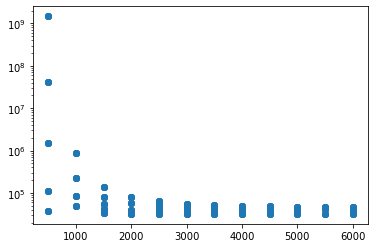

In [22]:
plt.plot(data[ind]['sfh.tau_main'],data[ind]['spire_250'],'o')
plt.yscale('log')

(0.0, 4.0)

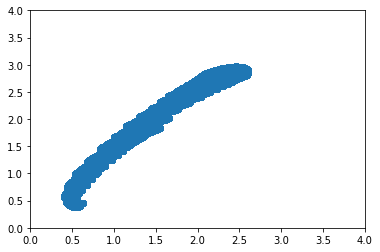

In [4]:
plt.plot(data['spire_250']/data['spire_350'],data['spire_350']/data['spire_500'],'o')
plt.xlim(0,4)
plt.ylim(0,4)

In [7]:
emulator=load_emulator('./CIGALE_emulator_20210420_log10sfr_uniformAGN_z.npz')


In [8]:
params=np.vstack((np.random.normal(1,3,1000),np.random.beta(1,3,1000),np.random.uniform(0,6,1000))).T

In [9]:
src_f = np.exp(np.array(jnp.exp(emulator['net_apply'](emulator['params'], params))))


W0118 13:33:03.271687 4569578944 xla_bridge.py:135] No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


(0.0, 4.0)

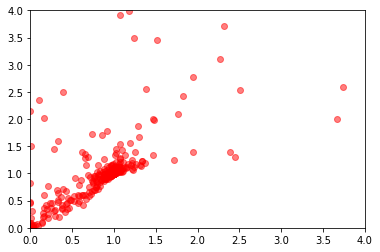

In [10]:
#plt.plot(data['spire_250']/data['spire_350'],data['spire_350']/data['spire_500'],'o',alpha=0.5)
plt.plot(src_f[:,0]/src_f[:,1],src_f[:,1]/src_f[:,2],'ro',alpha=0.5)
plt.xlim(0,4)
plt.ylim(0,4)


In [51]:
data[0:5]

id,spire_250,spire_350,spire_500,dust.luminosity,sfh.sfr,stellar.m_star,agn.fracAGN,attenuation.Av_BC,dust.alpha,sfh.tau_main,universe.redshift
,mJy,mJy,mJy,W,solMass / yr,solMass,,mag,,Myr,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0.041621887445926216,0.0002080181415828583,2.926302473957815,163086241946.35803,2285.3842238885068,5170197363.6743555,0.2287869561655,2.8773710997301,0.875,4136.0,3.2312133884323
0,0.019655286851182056,0.0002964214284852536,0.00014968833934695205,1301117562.9224253,0.02952183098477212,10254106544048.4,0.0659241997702,1.6244705608249,0.1875,4370.0,4.5875034068096
0,1.1506986992346848,225.90909807934815,6.915402736253743e-05,44953686280197.1,7516.589672174983,17390745137.038807,0.836677627888,1.3014726358861,1.125,5642.0,5.9429822537025
0,2907.64342324597,32.994055897694075,14.988485108568183,335179046751.79706,8.089860829410162,498222333.5690045,0.1043819947759,1.9722444509443,2.5625,3264.0,0.6359529324044
0,68.19325323190652,0.009632378759604269,0.0024900351480657973,699820530.3835655,130.0101872005839,831849678.8735007,0.0613394728339,3.1364487246045,2.25,5381.0,3.5932659978029


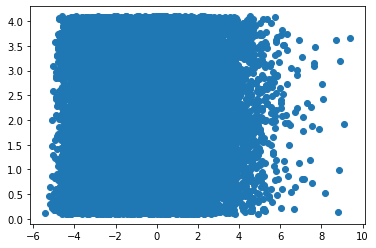

In [59]:
plt.plot(np.log10(data['spire_250']),data['attenuation.Av_BC'],'o')


In [46]:
data['universe.redshift']

3.2312133884323
4.5875034068096
5.9429822537025
0.6359529324044
3.5932659978029
1.8713190278726
4.1702110360301
0.4216650338058
3.7643498643524
3.1600160576012
3.4125055680069
